In [ ]:
# Download package from object storage

In [ ]:
from project_lib import Project
project = Project(project_id= '05d07336-a483-4286-99fe-8db076c2d8a9', project_access_token= 'p-ca0bec90883909bd2901585005ac052c7c369cf1')



def download_file(file_name):
    '''
    file_name = Name of zip file you want to download from object storage
    '''
    try:
        fobj = open(file_name, "wb")
        print(fobj)
        fobj.write(project.get_file(file_name).read()) 
        fobj.close()
        
    except Exception as e:
        print(Exception,e)
    else:
        print('Files downloaded successfully')
download_file('ibmdbpy4nps-0.2.1.7.tar.gz')

In [ ]:
#Install ibmdbpy4nps

In [ ]:
pip install ibmdbpy4nps-0.2.1.7.tar.gz

In [ ]:
# Connect to database table

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ibmdbpy4nps import IdaDataBase, IdaDataFrame
from ibmdbpy4nps.ae import NZFunTApply
from ibmdbpy4nps.ae import NZFunApply
from ibmdbpy4nps.ae import NZFunGroupedApply




dsn = "jdbc:netezza://169.63.46.17:5480/weather"

idadb = IdaDataBase(dsn, uid="admin", pwd="password")

print(idadb)

idadf = IdaDataFrame(idadb, 'weather')
print(idadf)



query = 'select * from weather limit 10000'

df = idadf.ida_query(query)


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ibmdbpy4nps/frame.py:45: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index, RangeIndex


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ibmdbpy4nps/utils.py:241: UserWarning: Mixed case names are not supported in database object names.
  warnings.warn("Mixed case names are not supported in database object names.", UserWarning)


In [ ]:
#Data exploration - head()

In [2]:
df.head()

,DATE,LOCATION,MINTEMP,MAXTEMP,RAINFALL,EVAPORATION,SUNSHINE,WINDGUSTDIR,WINDGUSTSPEED,WINDDIR9AM,...,PRESSURE9AM,PRESSURE3PM,CLOUD9AM,CLOUD3PM,TEMP9AM,TEMP3PM,RAINTODAY,RISK_MM,RAINTOMORROW,ID
0,2008-12-20,Albury,9.800000,25.6,0.000000,NaN,NaN,SSE,26.0,SE,...,1019.200012,1017.099976,None,None,15.800000,23.200001,No,0.0,No,448018
1,2010-02-05,Albury,19.200001,26.1,52.200001,NaN,NaN,SE,33.0,S,...,1009.900024,1009.400024,4,8,22.100000,25.000000,Yes,5.6,Yes,448429
2,2010-07-27,Albury,-1.200000,15.0,0.200000,NaN,NaN,SSE,15.0,None,...,1036.099976,1031.500000,None,None,4.000000,14.700000,No,0.0,No,448595
3,2010-12-06,Albury,18.900000,30.4,0.000000,NaN,NaN,ENE,43.0,SE,...,1012.700012,1008.900024,1,None,23.299999,29.299999,No,0.0,No,448726
4,2011-01-23,Albury,20.700001,31.4,0.000000,NaN,NaN,ENE,39.0,E,...,1010.400024,1006.099976,None,None,24.600000,30.900000,No,0.0,No,448774


In [ ]:
#Data exploration -corr()

                MINTEMP   MAXTEMP  RAINFALL  EVAPORATION  SUNSHINE  \
MINTEMP        1.000000  0.776277  0.117646     0.553034 -0.021882   
MAXTEMP        0.776277  1.000000 -0.089084     0.661539  0.409075   
RAINFALL       0.117646 -0.089084  1.000000    -0.133208 -0.317602   
EVAPORATION    0.553034  0.661539 -0.133208     1.000000  0.343433   
SUNSHINE      -0.021882  0.409075 -0.317602     0.343433  1.000000   
WINDGUSTSPEED  0.355558  0.271471  0.123541     0.281638 -0.080728   
WINDSPEED9AM   0.319344  0.108464  0.119017     0.240754 -0.078749   
WINDSPEED3PM   0.198131  0.099291  0.074751     0.049627 -0.029795   
HUMIDITY9AM   -0.334333 -0.534257  0.226034    -0.578588 -0.566136   
HUMIDITY3PM   -0.105033 -0.551351  0.287031    -0.467073 -0.644674   
PRESSURE9AM   -0.509085 -0.397087 -0.141693    -0.363883  0.004059   
PRESSURE3PM   -0.497666 -0.462489 -0.103197    -0.370719 -0.034582   
TEMP9AM        0.913118  0.895119  0.009300     0.591256  0.252085   
TEMP3PM        0.745

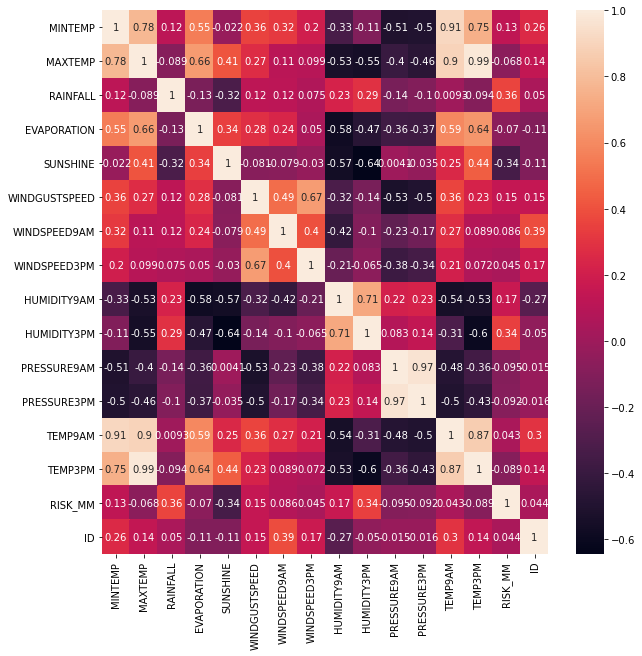

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
print(df.corr())
sns.heatmap(df.corr(), annot=True)

In [ ]:
#ML at client side

In [ ]:
from sklearn.model_selection import train_test_split
from collections import defaultdict



import time
start = time.time()



def decision_tree_ml(dataset,name):
   
    import numpy as np

    from sklearn.model_selection import cross_val_score
    from sklearn.impute import SimpleImputer
    from sklearn.tree import DecisionTreeClassifier

    from sklearn.preprocessing import LabelEncoder
    
    temp_dict = dict()
    
    # data preparation
  
    imputed_df = dataset.copy()
    ds_size = len(imputed_df)
  

    
    #impute missing values
    # mean for numerical and 'missing' for categorical
    #encode categorical variables
    columns = imputed_df.columns
    for column in columns:
        
        if column=='ID':
            continue

        if (imputed_df[column].dtype == 'float64' or imputed_df[column].dtype == 'int64'):
           
            
            if imputed_df[column].isnull().sum()==len(imputed_df):
                
                imputed_df[column] = imputed_df[column].fillna(0)
           
           
            else :
           
             imp = SimpleImputer(missing_values=np.nan, strategy='mean')

             transformed_column = imp.fit_transform(imputed_df[column].values.reshape(-1, 1))
            

             imputed_df[column] = transformed_column
          

        if (imputed_df[column].dtype == 'object'):
            # impute missing values for categorical variables
           

            imp = SimpleImputer(missing_values=None, strategy='constant', fill_value='missing')
            imputed_df[column] = imp.fit_transform(imputed_df[column].values.reshape(-1, 1))
            imputed_df[column] = imputed_df[column].astype('str')
           
            le = LabelEncoder()
          

            le.fit(imputed_df[column])
            #print(le.classes_)
            imputed_df[column] = le.transform(imputed_df[column])
            #print(imputed_df[column])
            temp_dict[column] = le

    
    
   

    # Create a decision tree
    dt = DecisionTreeClassifier(max_depth=5)
    X = imputed_df.drop(['RISK_MM','RAINTOMORROW'], axis=1)
    y = imputed_df['RAINTOMORROW']
    #print(y)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42, stratify=y)
   
    #X_train_mod = X_train.drop(['RISK_MM'],axis=1)
    #X_test_mod = X_test.drop(['RISK_MM'],axis=1)
    #print(X_train)
   
    dt.fit(X_train, y_train)
  
    accuracy = dt.score(X_test, y_test)    
    #print(accuracy)
    
 
   
    pred_df = X_test.copy()
    #pred_df['RISK_MM'] = X_test['RISK_MM']
    #print("dtypes after preprocessing")
    #print(pred_df.dtypes)
    y_pred= dt.predict(X_test)
    
    pred_df['RAINTOMORROW'] = y_pred
    pred_df['DATASET_SIZE'] = ds_size
    pred_df['CLASSIFIER_ACCURACY']=round(accuracy,2)
   
    #for all the columns that had label encoders, do an inverse transform

    original_columns = pred_df.columns
  
    for column in original_columns:
        
     if column in temp_dict:   
      pred_df[column] = temp_dict[column].inverse_transform(pred_df[column])
   
   
    return pred_df




def grouped_local(df):
    final_columns = df.columns.values.tolist()
   
    
    result_df=pd.DataFrame(columns= final_columns+['DATASET_SIZE', 'CLASSIFIER_ACCURACY'])
   

   
    #bins = pd.cut(df['ID'], 3)
    #print(bins)
    result = df.groupby('LOCATION')
    #result = df.groupby(pd.qcut(df['ID'], q=192))

  
    

    for name, group in result:
        #print(name)

        
        ml_result = decision_tree_ml(dataset=group,name=name)
        #print(ml_result)
        result_df=result_df.append(ml_result)

    return result_df
    



result_df=grouped_local(df=df)

end = time.time()
print(end-start)




 
#plt.figure(figsize=(30,20))   
sns.catplot(x="LOCATION", hue="RAINTOMORROW",

                data=result_df, kind="count", height=5, aspect =3, order=result_df.LOCATION.value_counts().iloc[:10].index);

               
#sns.countplot(x='LOCATION', hue='RAINTOMORROW', data=result_df)

plt.show()